In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

def extract_title_from_filename(filename):
    """Extracts the title components from the filename."""
    parts = Path(filename).stem.split('_')  # Remove .csv and split
    if len(parts) == 3:
        distribution, method, parameter = parts
        folder_name = f"{distribution}_{method}"
        return f"{distribution}_{method}_{parameter}", parameter.capitalize(), folder_name
    return filename, "Unknown", "Unknown"

def plot_time_series(phi_filename, theta_filename, save_plots=False, output_dir=None, num_points=None):
    """Create time series plots for phi and theta datasets with additional analysis."""
    # Read data
    phi_df = pd.read_csv(phi_filename)
    theta_df = pd.read_csv(theta_filename)

    # Extract title information
    phi_title, phi_param, folder_name = extract_title_from_filename(phi_filename)
    theta_title, theta_param, _ = extract_title_from_filename(theta_filename)

    # Determine output directory
    if save_plots:
        output_dir = Path(output_dir) / folder_name
        output_dir.mkdir(parents=True, exist_ok=True)

    # Slice data if needed
    if num_points is not None:
        phi_df = phi_df.head(num_points)
        theta_df = theta_df.head(num_points)

    # Set style and default figure size
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = [12, 10]

    def create_subplots(df, title, param):
        """Create a figure with four subplots: original data, moving average, difference, and histogram."""
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        ax1, ax2, ax3, ax4 = axes.flatten()

        # Calculate difference
        difference = df['moving_average'] - df['value']

        # Plot 1: Original time series
        ax1.plot(df['time'], df['value'], 'b-', linewidth=1)
        ax1.set_title(f'a', fontweight="bold", fontsize=14)
        ax1.set_xlabel('Time',fontweight="bold", fontsize=14)
        ax1.set_ylabel(f'{param} Value', fontweight="bold", fontsize=14)

        # Plot 2: Moving Average
        ax2.plot(df['time'], df['moving_average'], 'r-', linewidth=1)
        ax2.set_title(f'b', fontweight="bold", fontsize=14)
        ax2.set_xlabel('Time', fontweight="bold", fontsize=14)
        ax2.set_ylabel(f'{param} Value', fontweight="bold", fontsize=14)

        # Plot 3: Difference between actual and moving average
        ax3.plot(df['time'], difference, 'g-', linewidth=1)
        ax3.set_title(f'c', fontweight="bold", fontsize=14)
        ax3.set_xlabel('Time', fontweight="bold", fontsize=14)
        ax3.set_ylabel('Difference', fontweight= "bold", fontsize=14)

        # Plot 4: Histogram of fluctuations
        ax4.hist(difference, bins=30, color='purple', alpha=0.7)
        ax4.set_title('d', fontweight="bold", fontsize=14)
        ax4.set_xlabel('Difference Value', fontweight="bold", fontsize=14)
        ax4.set_ylabel('Frequency', fontweight="bold", fontsize=14)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate suptitle

        if save_plots:
            plot_path = output_dir / f"{title}_analysis.pdf"
            plt.savefig(plot_path, dpi=350, bbox_inches='tight')
            plt.close()
            return plot_path

        plt.show()
        return None

    # Create plots for both phi and theta
    all_plot_paths = {
        'phi': create_subplots(phi_df, phi_title, phi_param),
        'theta': create_subplots(theta_df, theta_title, theta_param)
    }

    return all_plot_paths if save_plots else None

def process_all_distributions(data_dir, output_dir, num_points=None):
    """
    Process all distribution files in the given directory.

    Args:
        data_dir (str): Directory containing the data files
        output_dir (str): Directory to save the plots
        num_points (int, optional): Number of points to plot
    """

    data_dir = Path(data_dir)
    output_dir = Path(output_dir)

    # Define expected distributions and methods
    distributions = ['Gamma', 'InvG', 'LogN', 'Weib']
    methods = ['LeastSquare', 'MLE']

    # Process each distribution and method combination
    for dist in distributions:
        print(f"\nProcessing {dist} distribution...")
        for method in methods:
            # Find matching phi and theta files
            pattern = f"{dist}_{method}_*.csv"
            matching_files = list(data_dir.glob(pattern))

            # Group phi and theta files
            phi_file = next((f for f in matching_files if 'phi' in f.name.lower()), None)
            theta_file = next((f for f in matching_files if 'theta' in f.name.lower()), None)

            if phi_file and theta_file:
                print(f"Processing {method} method...")
                try:
                    plot_time_series(
                        str(phi_file),
                        str(theta_file),
                        save_plots=True,
                        output_dir=output_dir,
                        num_points=num_points
                    )
                    print(f"Successfully created plots for {dist}_{method}")
                except Exception as e:
                    print(f"Error processing {dist}_{method}: {str(e)}")
            else:
                print(f"Warning: Could not find matching phi/theta files for {dist}_{method}")

# Example usage:
if __name__ == "__main__":
    # Process all distributions in the data directory
    process_all_distributions(
        data_dir="/Users/moha-/Desktop/data_mohamed/Datasets/mohamed/processed_data/",
        output_dir="/Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots2",
        num_points=720
    )


Processing Gamma distribution...
Processing LeastSquare method...
Successfully created plots for Gamma_LeastSquare
Processing MLE method...
Successfully created plots for Gamma_MLE

Processing InvG distribution...
Processing LeastSquare method...
Successfully created plots for InvG_LeastSquare
Processing MLE method...
Successfully created plots for InvG_MLE

Processing LogN distribution...
Processing LeastSquare method...
Successfully created plots for LogN_LeastSquare
Processing MLE method...
Successfully created plots for LogN_MLE

Processing Weib distribution...
Processing LeastSquare method...
Successfully created plots for Weib_LeastSquare
Processing MLE method...
Successfully created plots for Weib_MLE



Processing Gamma distribution...
Processing LeastSquare method...
Training Phi model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1361 - val_loss: 0.0325
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0362 - val_loss: 0.0242
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0310 - val_loss: 0.0250
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0253 - val_loss: 0.0248
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0268 - val_loss: 0.0238
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0263 - val_loss: 0.0237
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0240 - val_loss: 0.0240
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0249 - val_loss: 0.0242
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0285 - val_loss: 0.0227
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0244 - val_loss: 0.0249
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0250 - val_loss: 0.0222
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0240 - val_l

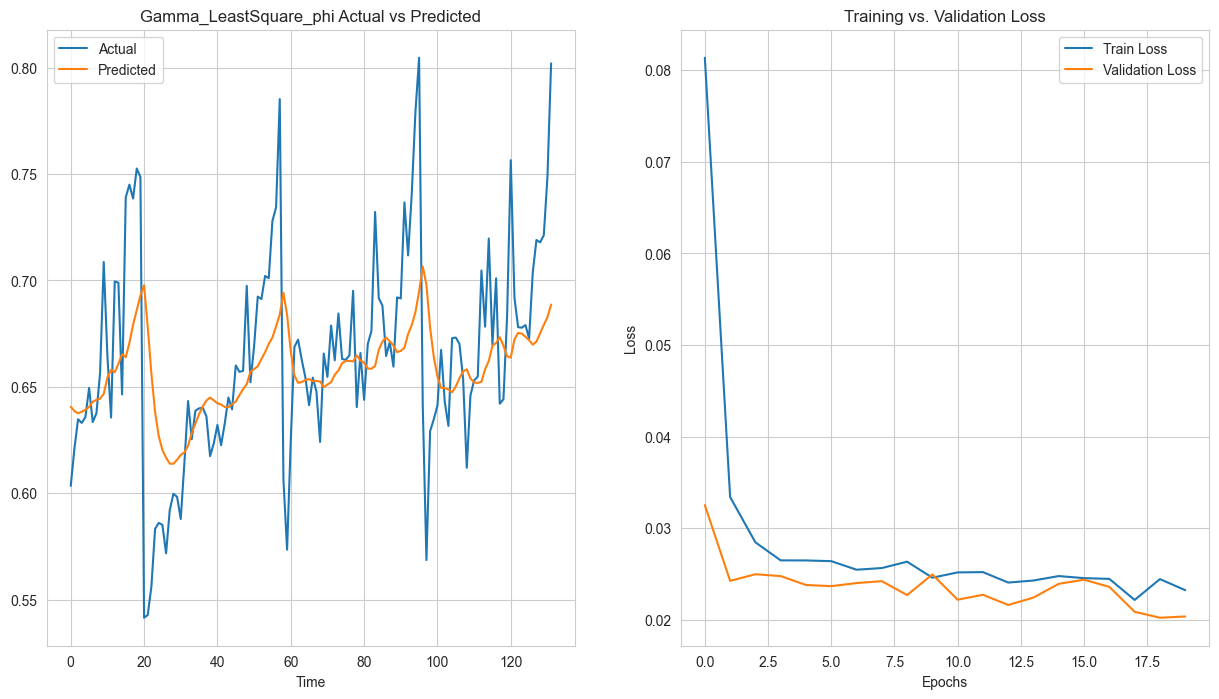

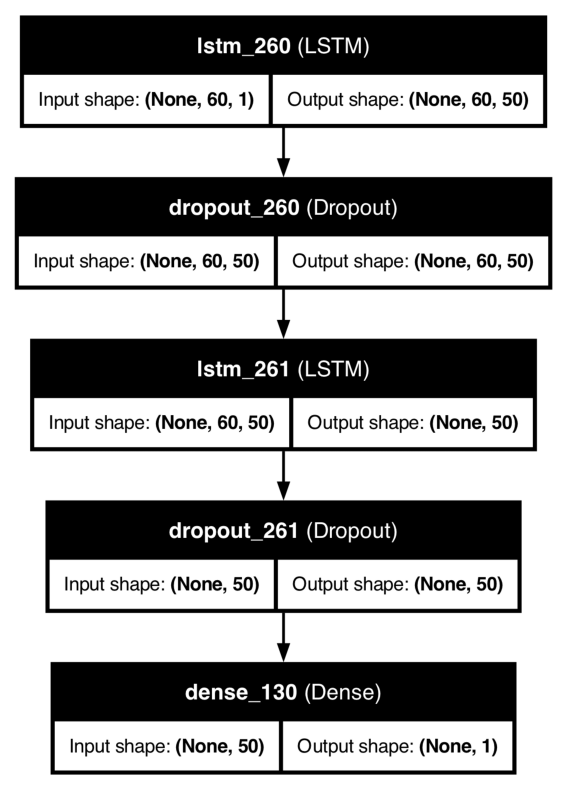

Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_260 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_260 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_261 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_261 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Gamma_LeastSquare/Gamma_LeastSquare_phi_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Gamma_LeastSquare/Gamma_LeastSquare_phi_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.08136376738548279, 0.03339511156082153, 0.028448745608329773, 0.02647622488439083, 0.026469305157661438, 0.02639138326048851, 0.025457648560404778, 0.025638047605752945, 0.026334498077630997, 0.02458352781832218, 0.02516312710940838, 0.025195254012942314, 0.024053486064076424, 0.02427856996655464, 0.024764060974121094, 0.024537306278944016, 0.024455389007925987, 0.022156499326229095, 0.02443249337375164, 0.023225080221891403]
Training Theta model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0480 - val_loss: 0.0194
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0271 - val_loss: 0.0173
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0220 - val_loss: 0.0165
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0199 - val_loss: 0.0126
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - val_loss: 0.0099
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0153 - val_loss: 0.0139
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - val_loss: 0.0117
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - val_loss: 0.0092
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0140 - val_loss: 0.0091
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - val_loss: 0.0085
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0142 - val_loss: 0.0088
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - val_l

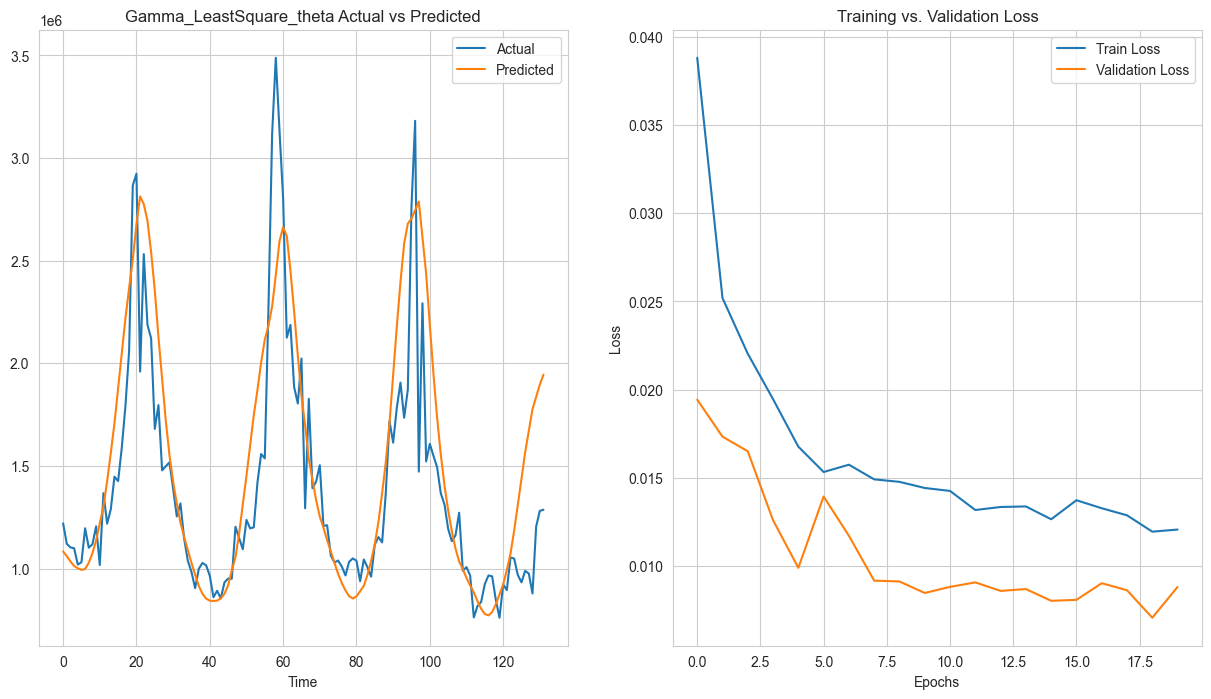

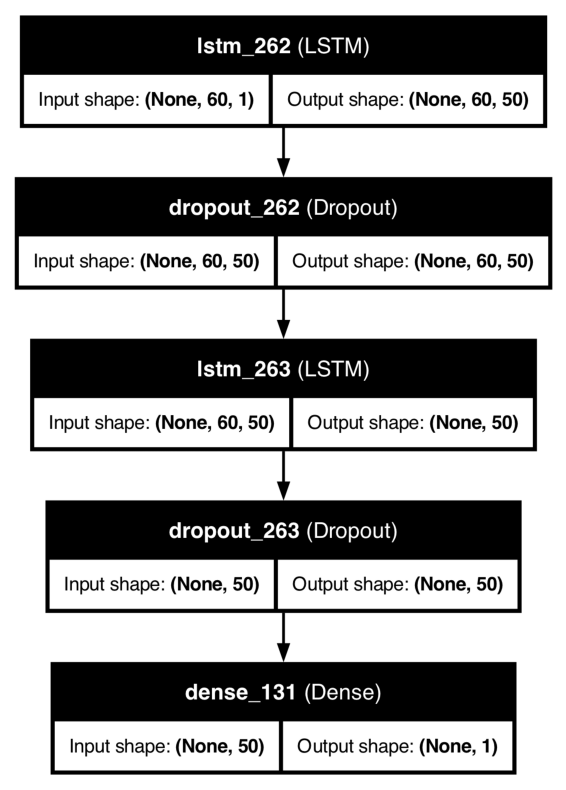

Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_262 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_262 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_263 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_263 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Gamma_LeastSquare/Gamma_LeastSquare_theta_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Gamma_LeastSquare/Gamma_LeastSquare_theta_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.03881080448627472, 0.025196362286806107, 0.022039666771888733, 0.01946449838578701, 0.016772747039794922, 0.015336311422288418, 0.0157503392547369, 0.014920142479240894, 0.01477861125022173, 0.014431161805987358, 0.014264537952840328, 0.013182331807911396, 0.013354341499507427, 0.013385968282818794, 0.01265919953584671, 0.013736645691096783, 0.013283739797770977, 0.012881848029792309, 0.011956934817135334, 0.0120755136013031]
Successfully processed Gamma_LeastSquare
Processing MLE method...
Training Phi model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2374 - val_loss: 0.0201
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0281 - val_loss: 0.0139
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0178 - val_loss: 0.0167
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0231 - val_loss: 0.0147
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0200 - val_loss: 0.0138
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0176 - val_loss: 0.0166
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0198 - val_loss: 0.0148
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0209 - val_loss: 0.0161
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0204 - val_loss: 0.0140
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0180 - val_loss: 0.0144
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0185 - val_loss: 0.0145
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0167 - val_l

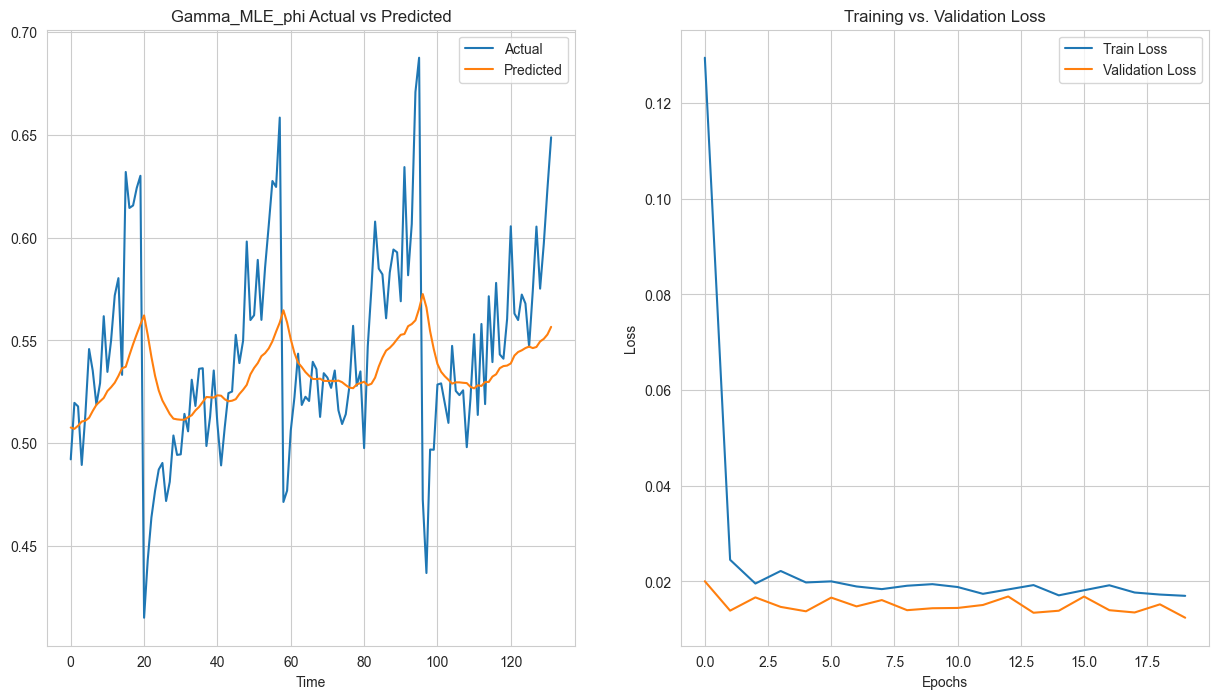

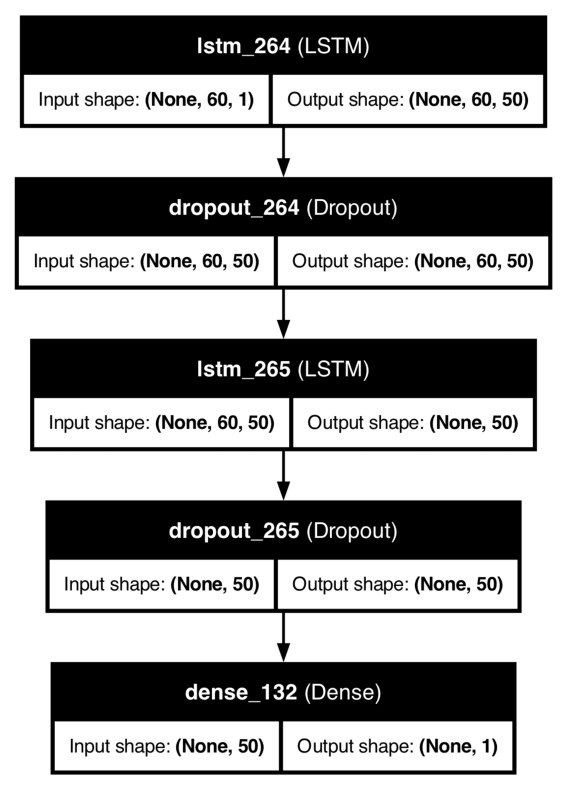

Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_264 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_264 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_265 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_265 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Gamma_MLE/Gamma_MLE_phi_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Gamma_MLE/Gamma_MLE_phi_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.12946678698062897, 0.0245351642370224, 0.019567890092730522, 0.02219567634165287, 0.01979796774685383, 0.020026348531246185, 0.01895984448492527, 0.01840624213218689, 0.019112179055809975, 0.0194421224296093, 0.018842345103621483, 0.017421353608369827, 0.018338825553655624, 0.019247591495513916, 0.01710522174835205, 0.01817001774907112, 0.019207365810871124, 0.01769457571208477, 0.017269501462578773, 0.017000947147607803]
Training Theta model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0109 - val_loss: 0.0039
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0064 - val_loss: 0.0042
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0064 - val_loss: 0.0038
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - val_loss: 0.0034
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0058 - val_loss: 0.0030
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0063 - val_loss: 0.0029
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0059 - val_loss: 0.0026
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0095 - val_loss: 0.0025
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0048 - val_loss: 0.0026
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - val_l

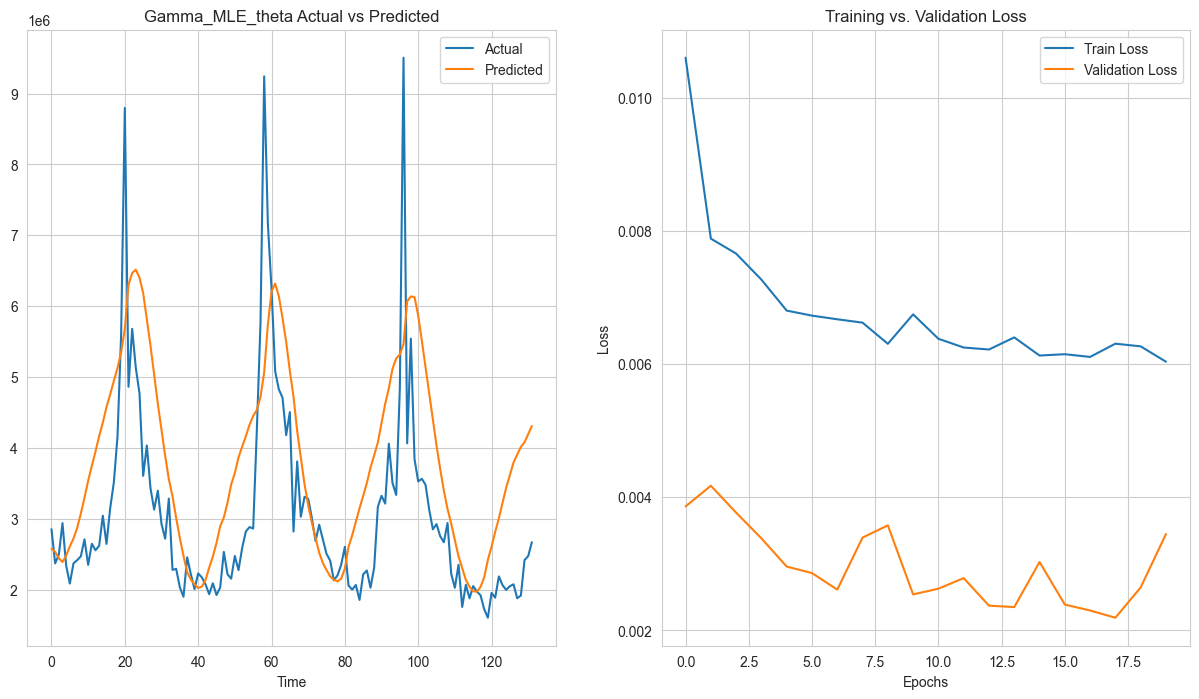

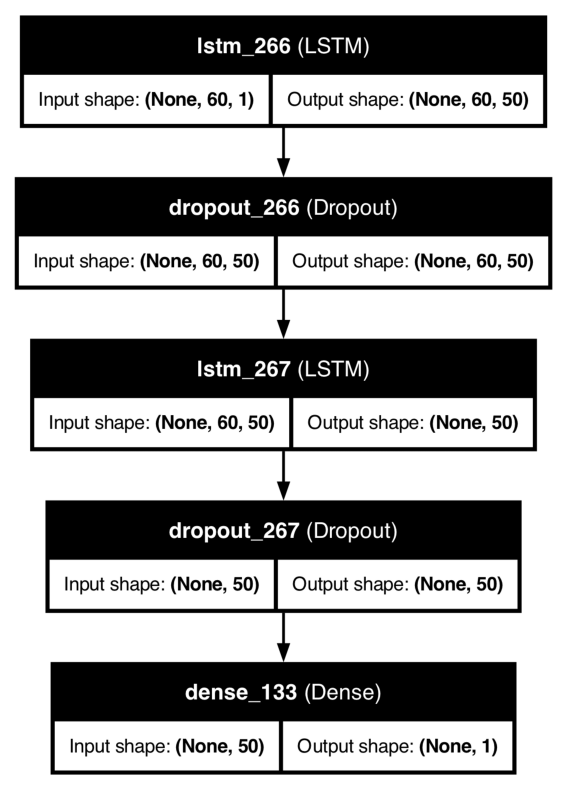

Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_266 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_266 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_267 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_267 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Gamma_MLE/Gamma_MLE_theta_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Gamma_MLE/Gamma_MLE_theta_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.010607837699353695, 0.007888399995863438, 0.007663118187338114, 0.007271535694599152, 0.0068062180653214455, 0.0067308153957128525, 0.00667592603713274, 0.006625257898122072, 0.006307272706180811, 0.006749915890395641, 0.006382833234965801, 0.006251509301364422, 0.006221615709364414, 0.006403503939509392, 0.006130848079919815, 0.006150775123387575, 0.006110229529440403, 0.006309201009571552, 0.006268850993365049, 0.00603809067979455]
Successfully processed Gamma_MLE

Processing InvG distribution...
Processing LeastSquare method...
Training Phi model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0811 - val_loss: 0.0312
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0276 - val_loss: 0.0211
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0230 - val_loss: 0.0216
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0240 - val_loss: 0.0205
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0227 - val_loss: 0.0256
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0242 - val_loss: 0.0198
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0232 - val_loss: 0.0212
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0209 - val_loss: 0.0229
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0235 - val_loss: 0.0190
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0238 - val_loss: 0.0198
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0233 - val_loss: 0.0186
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0250 - val_l

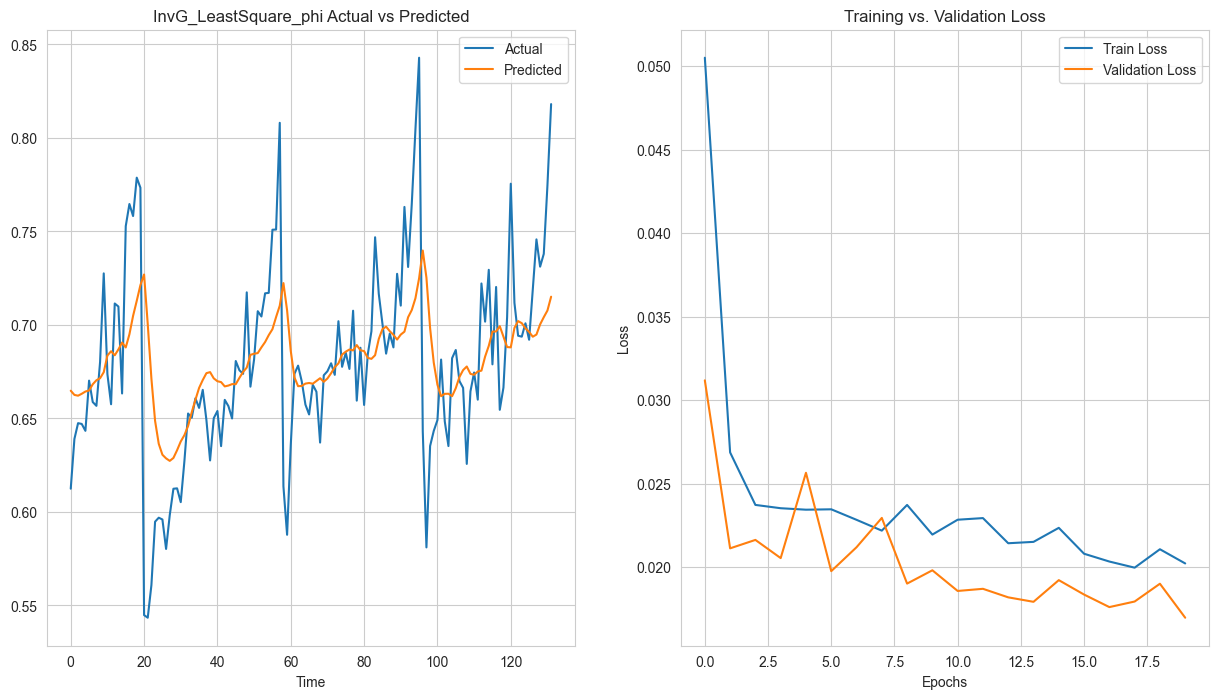

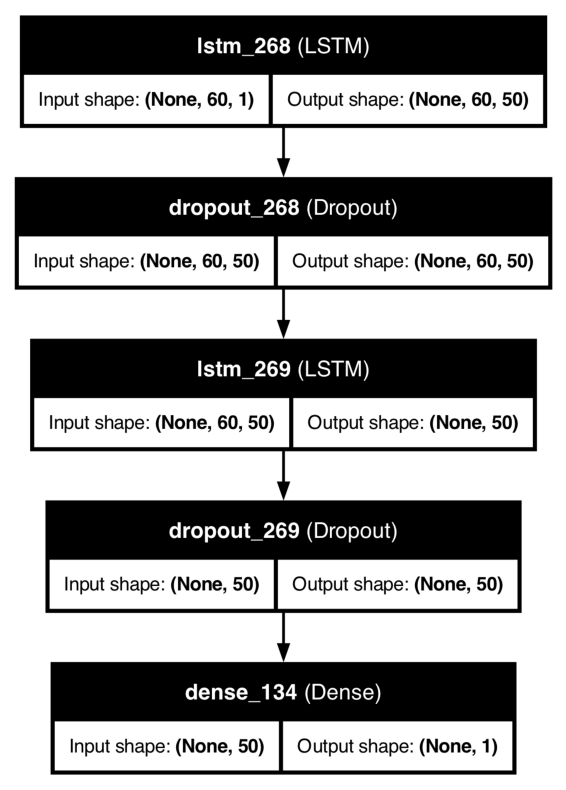

Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_268 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_268 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_269 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_269 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/InvG_LeastSquare/InvG_LeastSquare_phi_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/InvG_LeastSquare/InvG_LeastSquare_phi_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.05051368102431297, 0.026865512132644653, 0.023719776421785355, 0.023521848022937775, 0.023433426395058632, 0.023456741124391556, 0.022826889529824257, 0.022178487852215767, 0.023718154057860374, 0.021942608058452606, 0.022832633927464485, 0.022930601611733437, 0.02142355963587761, 0.021505823358893394, 0.022346345707774162, 0.02079501748085022, 0.02032730169594288, 0.01996036246418953, 0.021063577383756638, 0.020213119685649872]
Training Theta model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0260 - val_loss: 0.0121
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - val_loss: 0.0122
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - val_loss: 0.0111
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - val_loss: 0.0108
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - val_loss: 0.0101
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - val_loss: 0.0097
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0093 - val_loss: 0.0101
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0101 - val_loss: 0.0093
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - val_loss: 0.0088
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0100 - val_loss: 0.0086
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0115 - val_loss: 0.0094
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0114 - val_l

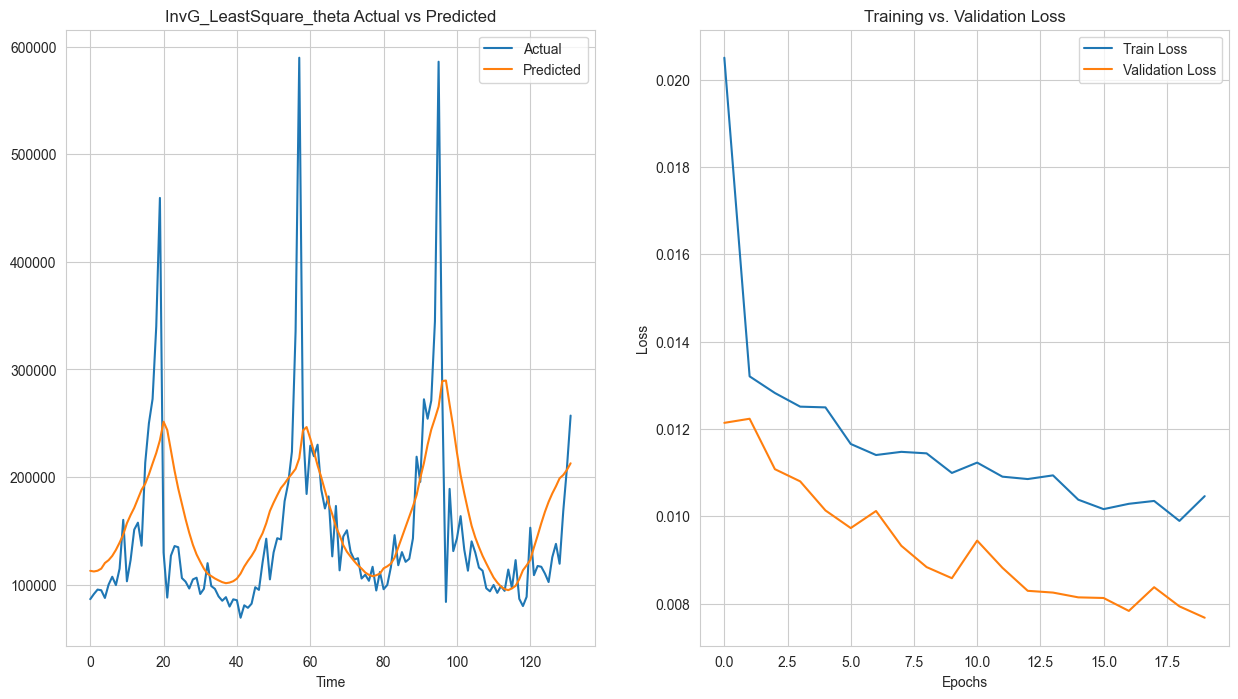

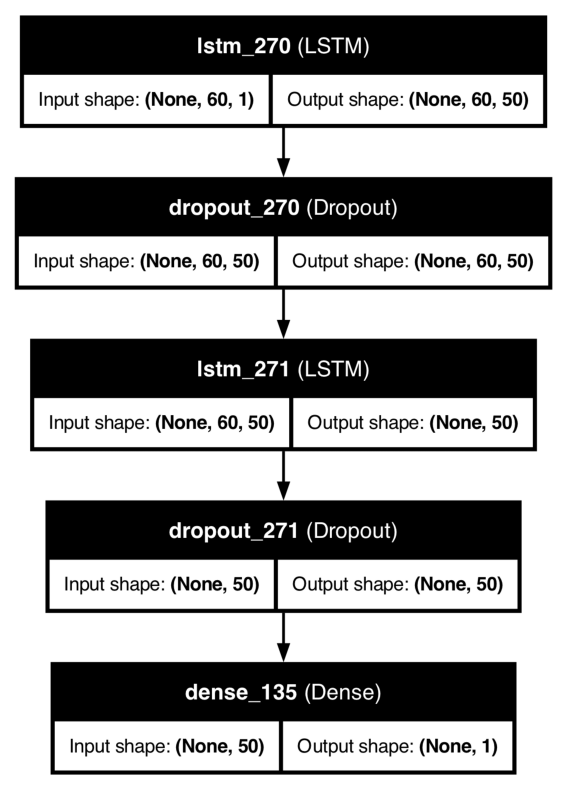

Model: "sequential_135"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_270 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_270 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_271 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_271 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/InvG_LeastSquare/InvG_LeastSquare_theta_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/InvG_LeastSquare/InvG_LeastSquare_theta_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.02050287090241909, 0.013204366900026798, 0.012823126278817654, 0.012510519474744797, 0.012493835762143135, 0.011655655689537525, 0.011402702890336514, 0.01147537026554346, 0.011440888978540897, 0.010992220602929592, 0.011229008436203003, 0.010906806215643883, 0.010852210223674774, 0.01093658059835434, 0.010379323735833168, 0.010163288563489914, 0.010285238735377789, 0.010350839234888554, 0.009893535636365414, 0.010460629127919674]
Successfully processed InvG_LeastSquare
Processing MLE method...
Training Phi model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1784 - val_loss: 0.0227
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0300 - val_loss: 0.0212
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0301 - val_loss: 0.0240
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0255 - val_loss: 0.0229
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0270 - val_loss: 0.0212
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0289 - val_loss: 0.0225
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0286 - val_loss: 0.0284
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0283 - val_loss: 0.0215
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0284 - val_loss: 0.0205
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0259 - val_loss: 0.0239
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0293 - val_loss: 0.0225
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0249 - val_l

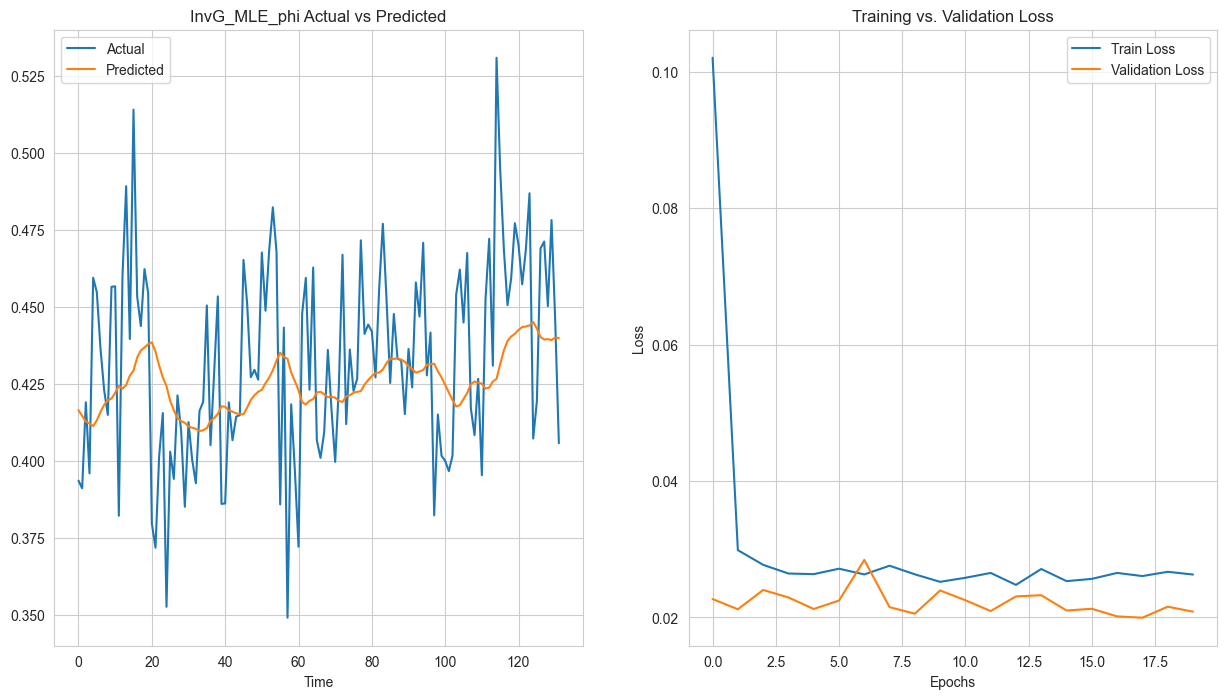

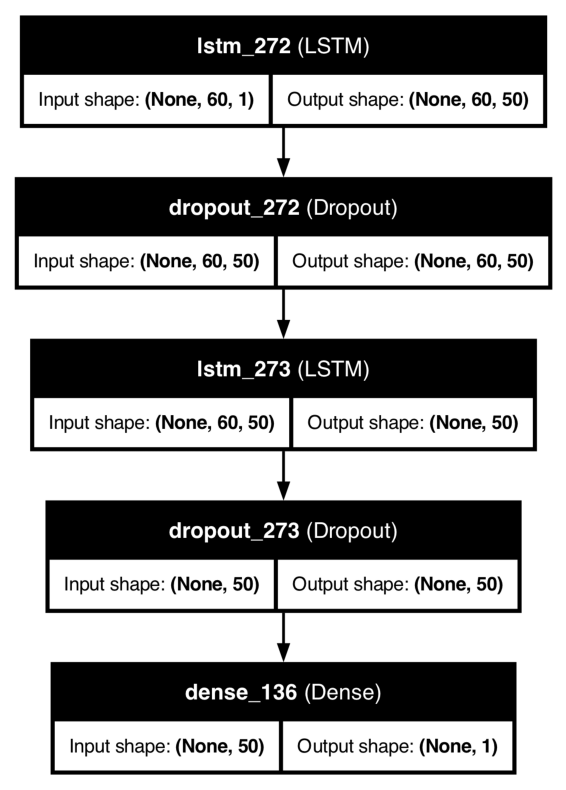

Model: "sequential_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_272 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_272 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_273 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_273 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/InvG_MLE/InvG_MLE_phi_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/InvG_MLE/InvG_MLE_phi_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.10206006467342377, 0.029861263930797577, 0.02770945429801941, 0.026434598490595818, 0.02634277008473873, 0.027140220627188683, 0.026300493627786636, 0.027579333633184433, 0.026316367089748383, 0.025215767323970795, 0.025810927152633667, 0.02651875652372837, 0.024770408868789673, 0.02709546685218811, 0.02531798742711544, 0.025649571791291237, 0.026521999388933182, 0.026060322299599648, 0.026688022539019585, 0.02628757432103157]
Training Theta model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0483 - val_loss: 0.0279
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0268 - val_loss: 0.0246
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0264 - val_loss: 0.0233
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0218 - val_loss: 0.0237
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0241 - val_loss: 0.0218
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0290 - val_loss: 0.0210
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0211 - val_loss: 0.0213
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0234 - val_loss: 0.0194
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0246 - val_loss: 0.0185
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0218 - val_loss: 0.0194
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0270 - val_loss: 0.0168
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0209 - val_l

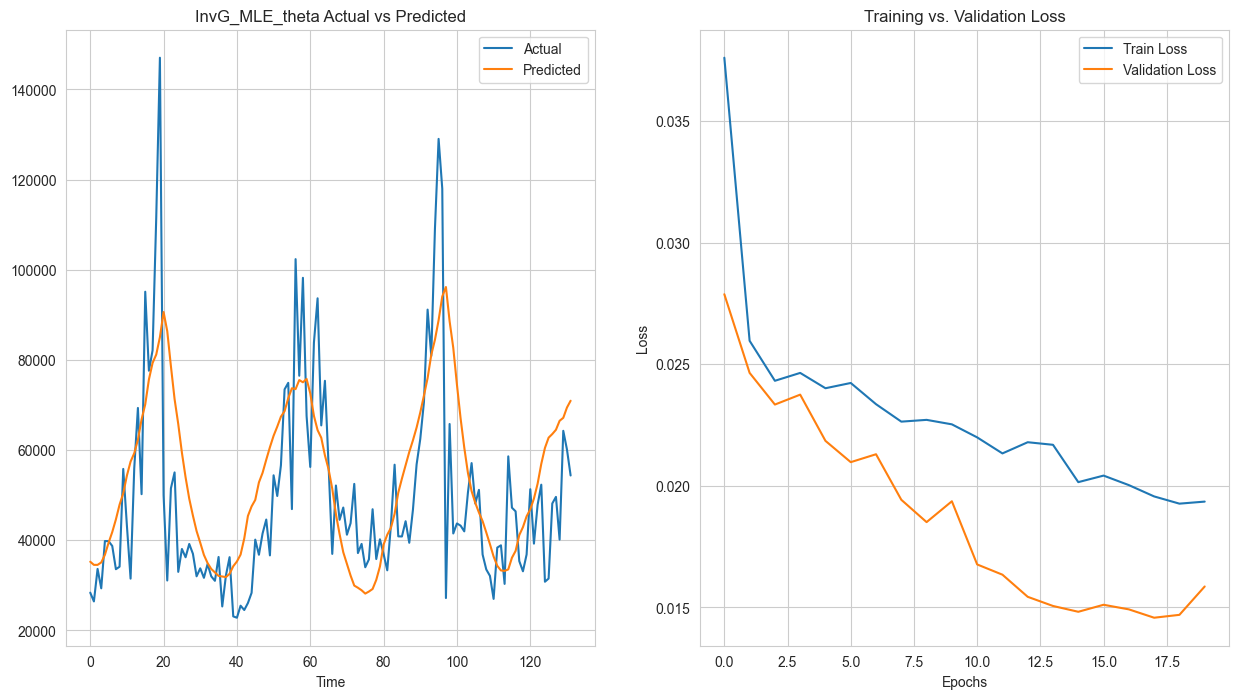

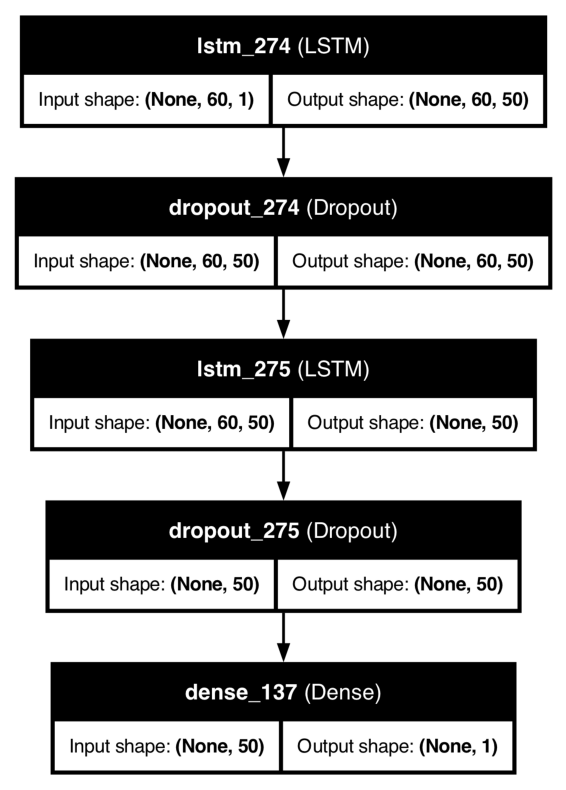

Model: "sequential_137"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_274 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_274 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_275 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_275 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/InvG_MLE/InvG_MLE_theta_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/InvG_MLE/InvG_MLE_theta_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.03759549558162689, 0.02596100978553295, 0.024316562339663506, 0.02464069426059723, 0.024010661989450455, 0.02422686479985714, 0.0233550276607275, 0.022637847810983658, 0.022710701450705528, 0.022526588290929794, 0.021990804001688957, 0.021331775933504105, 0.021791456267237663, 0.021685590967535973, 0.020151041448116302, 0.020419836044311523, 0.02002878487110138, 0.019563838839530945, 0.01926668919622898, 0.01935099996626377]
Successfully processed InvG_MLE

Processing LogN distribution...
Processing LeastSquare method...
Training Phi model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1541 - val_loss: 0.0189
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0232 - val_loss: 0.0187
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0203 - val_loss: 0.0160
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0158 - val_loss: 0.0151
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0205 - val_loss: 0.0144
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0182 - val_loss: 0.0137
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0170 - val_loss: 0.0142
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0164 - val_loss: 0.0132
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0153 - val_loss: 0.0107
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - val_loss: 0.0078
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - val_loss: 0.0065
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0142 - val_l

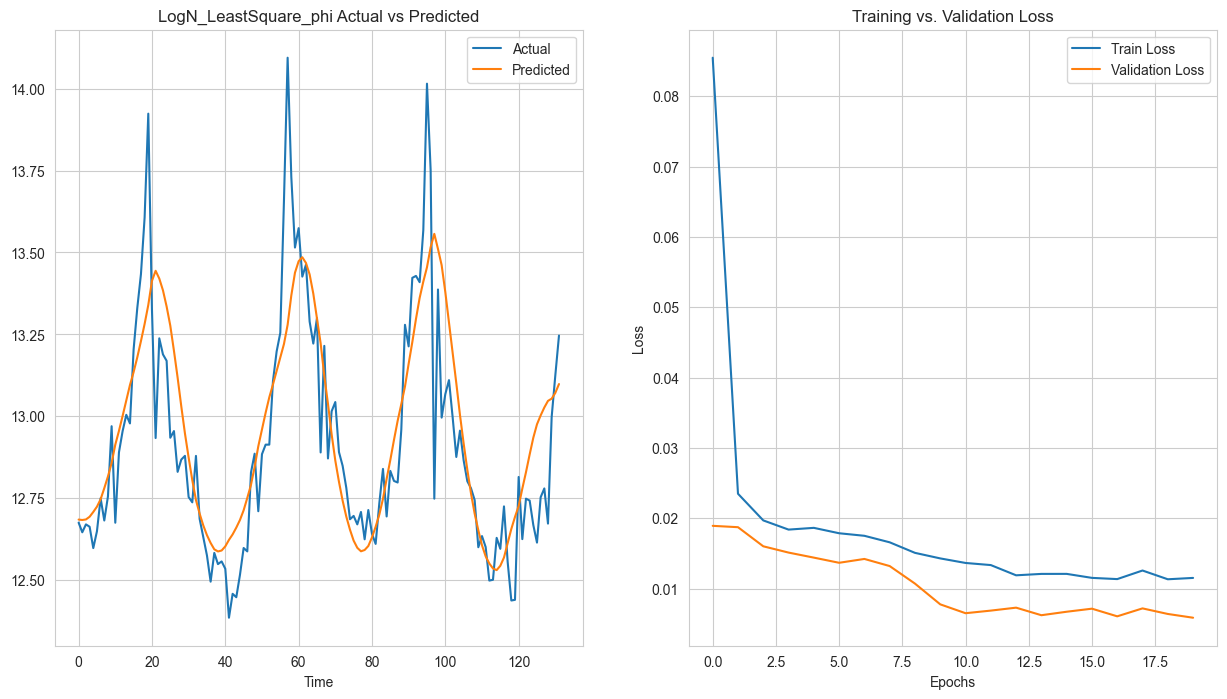

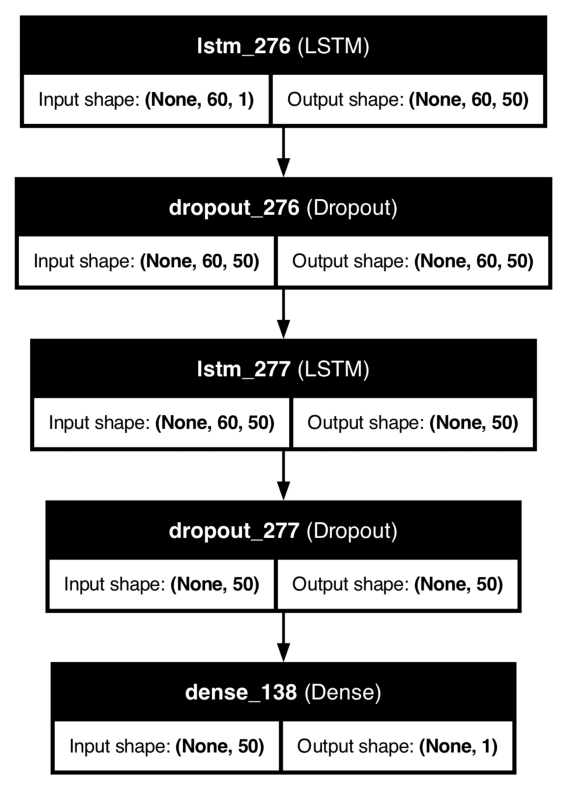

Model: "sequential_138"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_276 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_276 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_277 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_277 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/LogN_LeastSquare/LogN_LeastSquare_phi_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/LogN_LeastSquare/LogN_LeastSquare_phi_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.08547727018594742, 0.023479275405406952, 0.01968671940267086, 0.018379583954811096, 0.01862819865345955, 0.01786019280552864, 0.017498770728707314, 0.01657167077064514, 0.015073518268764019, 0.014283695258200169, 0.013636589050292969, 0.013335434719920158, 0.011880050413310528, 0.01207990013062954, 0.012083413079380989, 0.011515050195157528, 0.011342043057084084, 0.012561261653900146, 0.011316793039441109, 0.011509889736771584]
Training Theta model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1280 - val_loss: 0.0225
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0349 - val_loss: 0.0230
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0271 - val_loss: 0.0218
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0242 - val_loss: 0.0230
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0272 - val_loss: 0.0208
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0266 - val_loss: 0.0206
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0240 - val_loss: 0.0210
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0236 - val_loss: 0.0199
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0280 - val_loss: 0.0196
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0258 - val_loss: 0.0192
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0229 - val_loss: 0.0192
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0221 - val_l

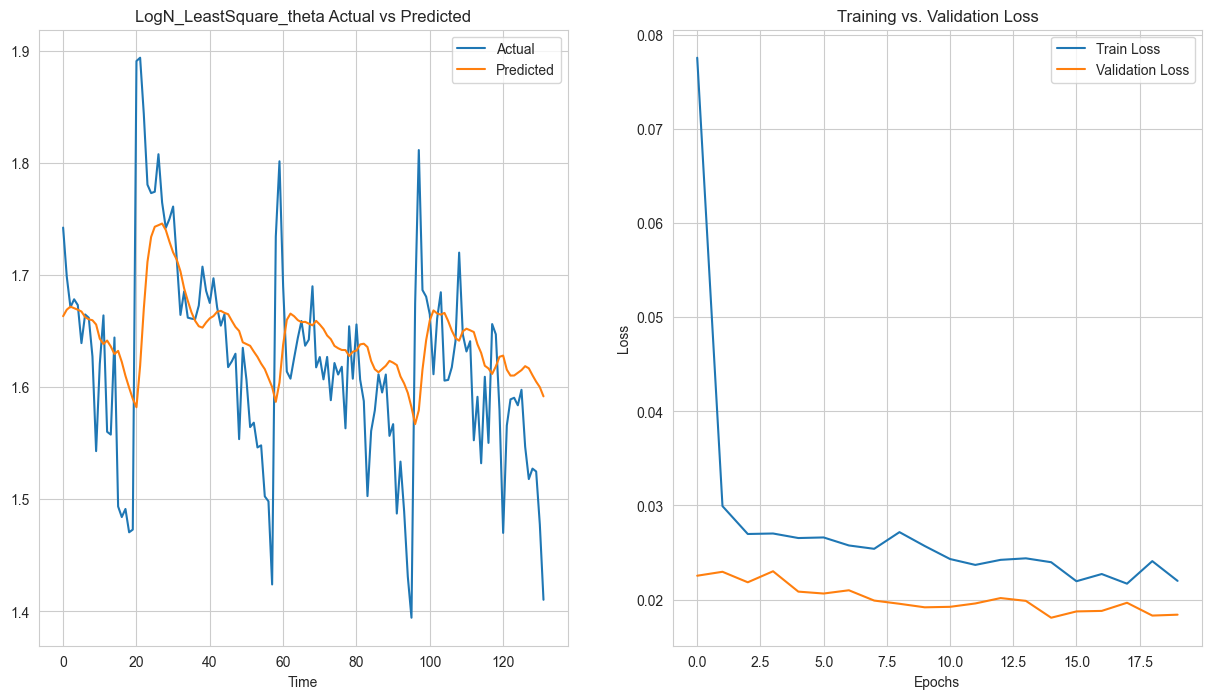

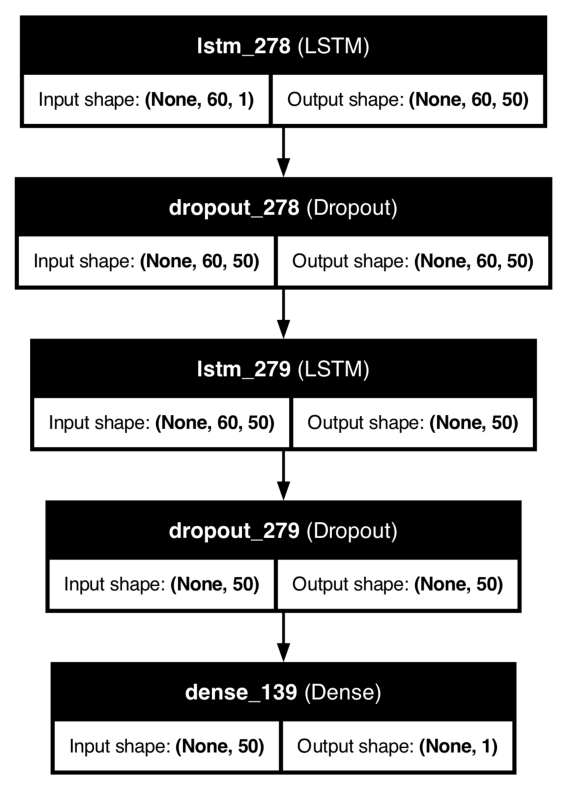

Model: "sequential_139"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_278 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_278 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_279 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_279 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/LogN_LeastSquare/LogN_LeastSquare_theta_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/LogN_LeastSquare/LogN_LeastSquare_theta_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.07755910605192184, 0.029930004850029945, 0.02696976251900196, 0.027021946385502815, 0.02654050663113594, 0.026603061705827713, 0.025751370936632156, 0.025395600125193596, 0.02716723084449768, 0.02569231577217579, 0.024311315268278122, 0.023686043918132782, 0.0242236889898777, 0.024385325610637665, 0.02397145703434944, 0.021952040493488312, 0.022717492654919624, 0.02169310487806797, 0.024087103083729744, 0.02198871225118637]
Successfully processed LogN_LeastSquare
Processing MLE method...
Training Phi model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1277 - val_loss: 0.0217
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0289 - val_loss: 0.0172
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0228 - val_loss: 0.0166
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0213 - val_loss: 0.0142
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0183 - val_loss: 0.0131
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0152 - val_loss: 0.0130
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0154 - val_loss: 0.0095
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - val_loss: 0.0084
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0124 - val_loss: 0.0071
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - val_loss: 0.0068
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - val_loss: 0.0073
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0109 - val_l

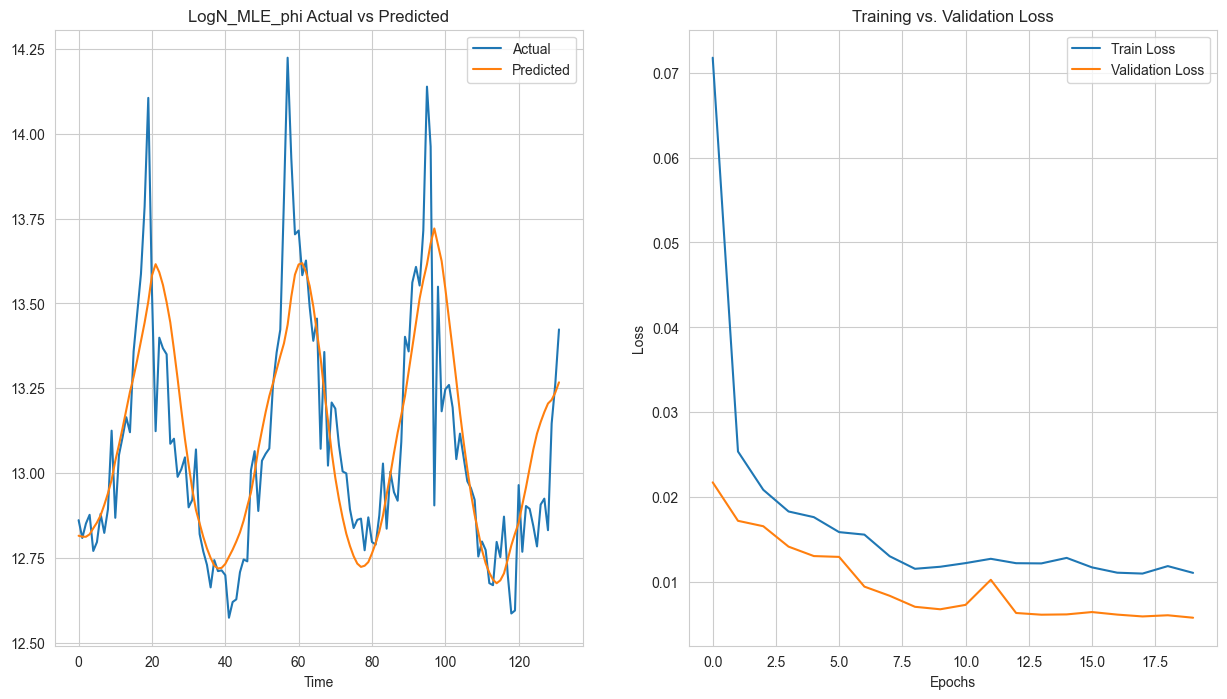

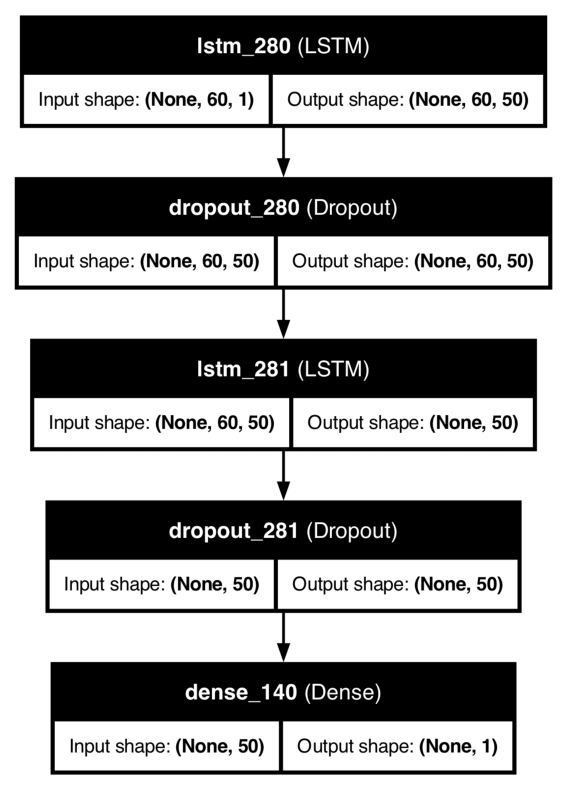

Model: "sequential_140"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_280 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_280 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_281 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_281 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/LogN_MLE/LogN_MLE_phi_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/LogN_MLE/LogN_MLE_phi_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.07175654917955399, 0.025382157415151596, 0.020870931446552277, 0.01831924170255661, 0.017650898545980453, 0.015887806192040443, 0.015592318959534168, 0.013046872802078724, 0.011568819172680378, 0.011808505281805992, 0.012238443829119205, 0.012745042331516743, 0.012227529659867287, 0.012203673832118511, 0.012853051535785198, 0.011737339198589325, 0.011109698563814163, 0.011005586013197899, 0.01188589632511139, 0.011087862774729729]
Training Theta model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0920 - val_loss: 0.0222
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0318 - val_loss: 0.0234
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0242 - val_loss: 0.0219
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0252 - val_loss: 0.0212
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0243 - val_loss: 0.0225
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0252 - val_loss: 0.0220
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0223 - val_loss: 0.0210
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0231 - val_loss: 0.0207
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0230 - val_loss: 0.0201
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0264 - val_loss: 0.0192
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0270 - val_loss: 0.0190
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0231 - val_l

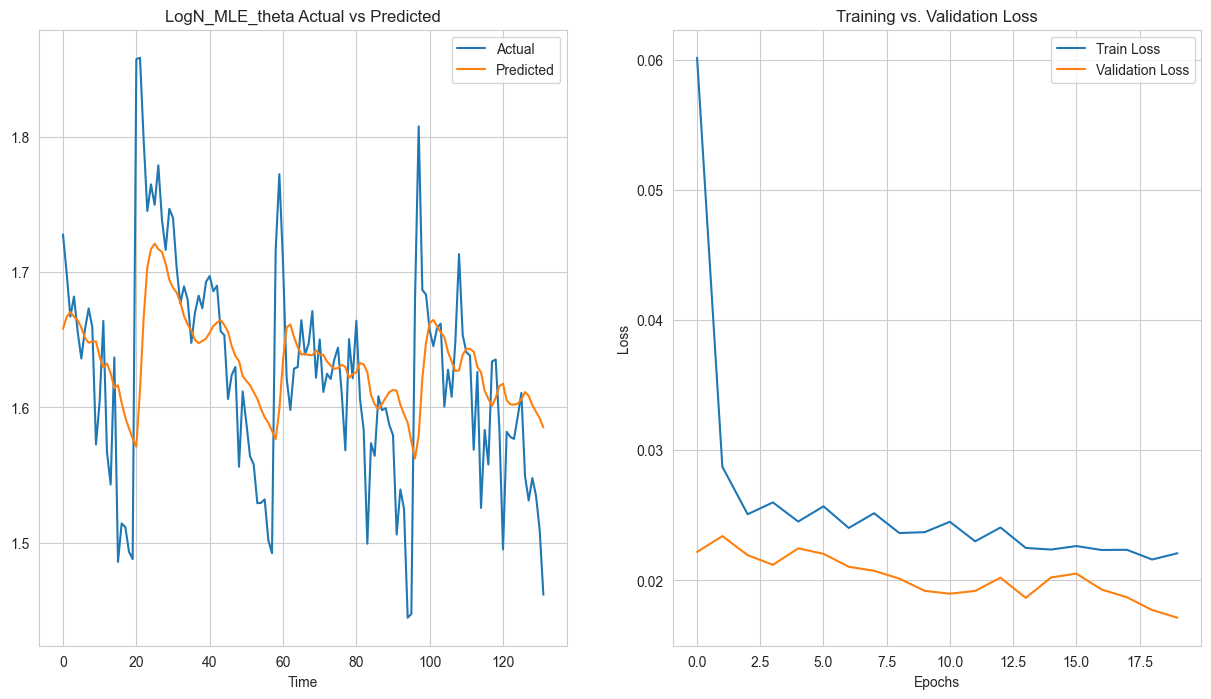

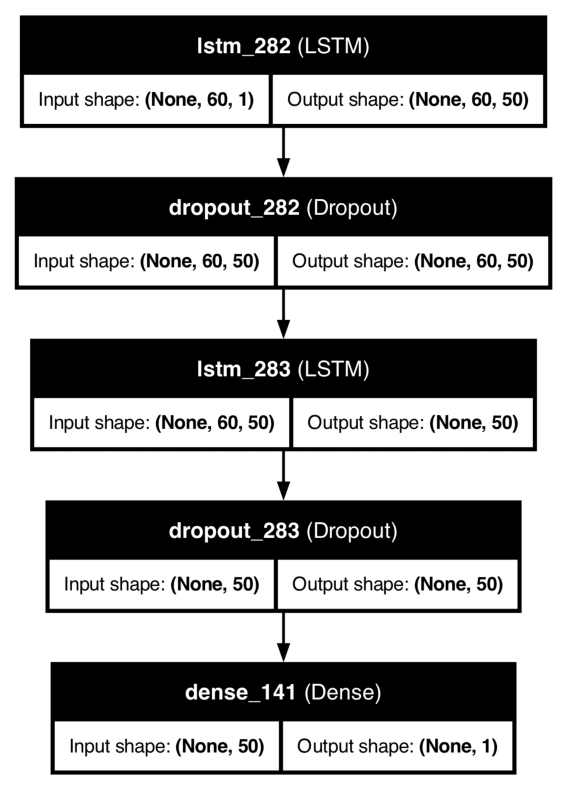

Model: "sequential_141"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_282 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_282 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_283 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_283 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/LogN_MLE/LogN_MLE_theta_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/LogN_MLE/LogN_MLE_theta_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.0601593442261219, 0.02872822992503643, 0.025081753730773926, 0.02598918043076992, 0.02451985515654087, 0.02568812668323517, 0.02402690052986145, 0.025157859548926353, 0.023637400940060616, 0.02370379865169525, 0.024501323699951172, 0.022998450323939323, 0.024062935262918472, 0.022491799667477608, 0.022366631776094437, 0.022636666893959045, 0.022333545610308647, 0.022348439320921898, 0.021601209416985512, 0.022083427757024765]
Successfully processed LogN_MLE

Processing Weib distribution...
Processing LeastSquare method...
Training Phi model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1325 - val_loss: 0.0284
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0316 - val_loss: 0.0229
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0279 - val_loss: 0.0226
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0266 - val_loss: 0.0228
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0256 - val_loss: 0.0282
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0279 - val_loss: 0.0237
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0251 - val_loss: 0.0225
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0297 - val_loss: 0.0245
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0299 - val_loss: 0.0211
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0272 - val_loss: 0.0211
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0260 - val_loss: 0.0207
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0223 - val_l

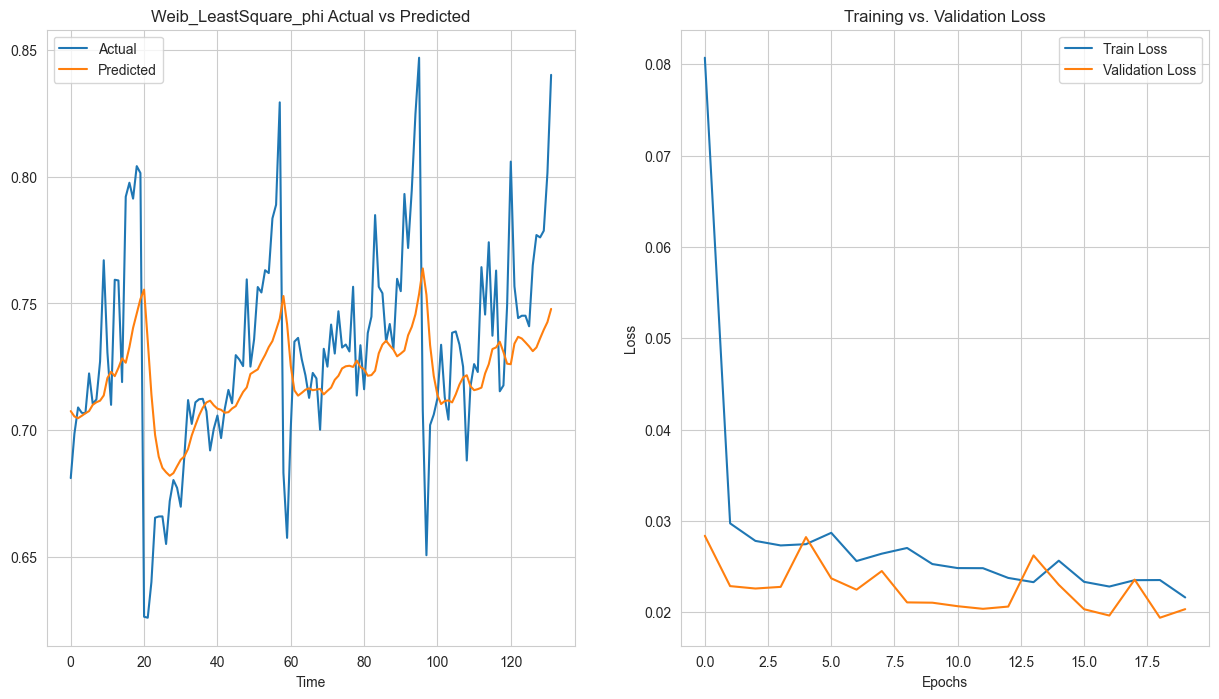

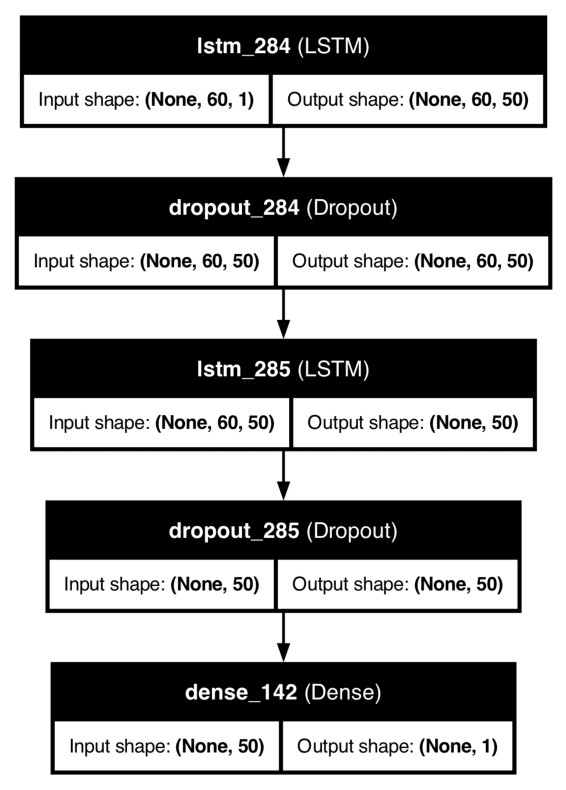

Model: "sequential_142"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_284 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_284 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_285 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_285 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Weib_LeastSquare/Weib_LeastSquare_phi_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Weib_LeastSquare/Weib_LeastSquare_phi_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.08070369064807892, 0.02973509021103382, 0.02781561203300953, 0.02731902152299881, 0.027454834431409836, 0.028699999675154686, 0.02561023458838463, 0.02641715295612812, 0.027041438966989517, 0.025279760360717773, 0.024839825928211212, 0.02482892945408821, 0.0237624142318964, 0.023296834900975227, 0.025648556649684906, 0.023333624005317688, 0.022819170728325844, 0.023516153916716576, 0.023530837148427963, 0.02162834443151951]
Training Theta model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0513 - val_loss: 0.0154
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0183 - val_loss: 0.0155
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0174 - val_loss: 0.0125
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0146 - val_loss: 0.0108
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0135 - val_loss: 0.0106
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0150 - val_loss: 0.0091
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0117 - val_loss: 0.0086
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - val_loss: 0.0079
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - val_loss: 0.0077
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - val_loss: 0.0078
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - val_loss: 0.0074
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0113 - val_l

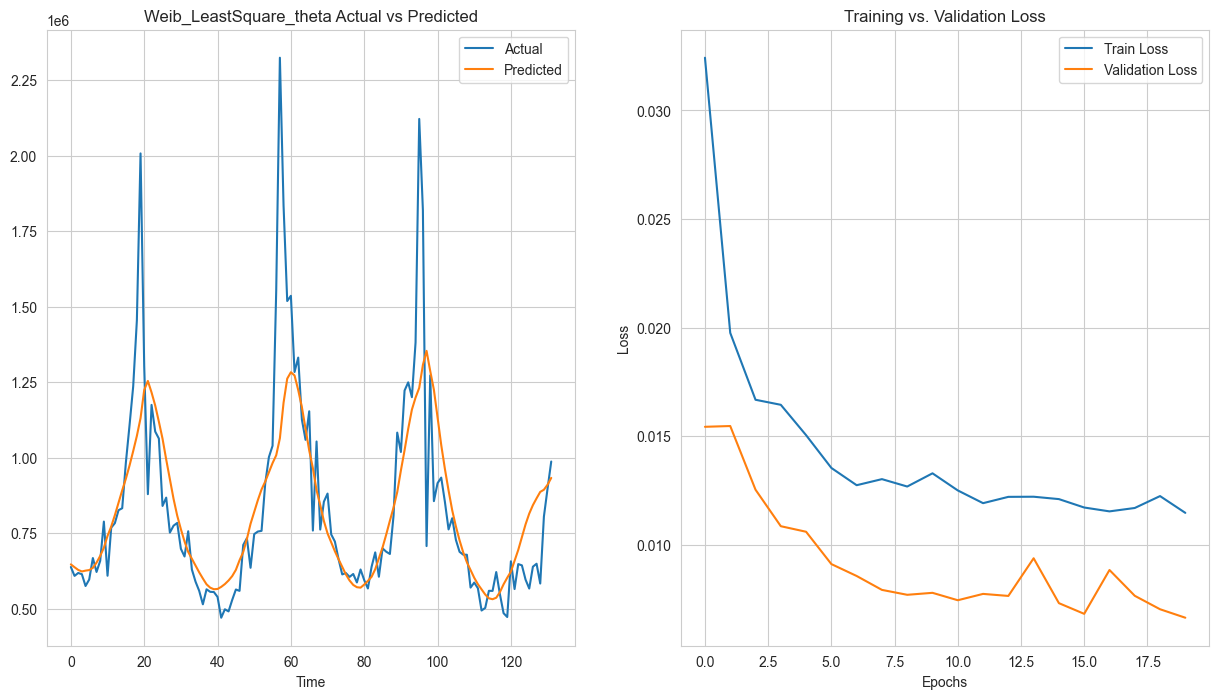

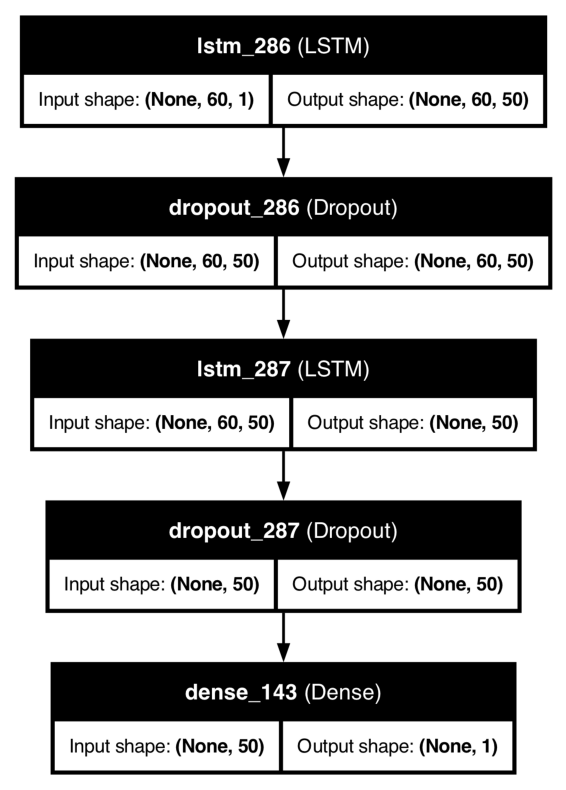

Model: "sequential_143"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_286 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_286 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_287 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_287 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Weib_LeastSquare/Weib_LeastSquare_theta_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Weib_LeastSquare/Weib_LeastSquare_theta_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.03242558240890503, 0.01975310780107975, 0.016672855243086815, 0.016440633684396744, 0.015042269602417946, 0.013532557524740696, 0.012737764045596123, 0.01301728468388319, 0.01267699059098959, 0.013285525143146515, 0.012497307732701302, 0.011910727247595787, 0.012201307341456413, 0.012207327410578728, 0.012097641825675964, 0.011710463091731071, 0.011532558128237724, 0.011688648723065853, 0.012236873619258404, 0.011463817209005356]
Successfully processed Weib_LeastSquare
Processing MLE method...
Training Phi model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.1854 - val_loss: 0.0254
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0287 - val_loss: 0.0158
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0253 - val_loss: 0.0180
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0238 - val_loss: 0.0179
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0233 - val_loss: 0.0161
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0206 - val_loss: 0.0168
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0230 - val_loss: 0.0154
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0221 - val_loss: 0.0169
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0188 - val_loss: 0.0223
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0236 - val_loss: 0.0166
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0183 - val_loss: 0.0167
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0192 - val_

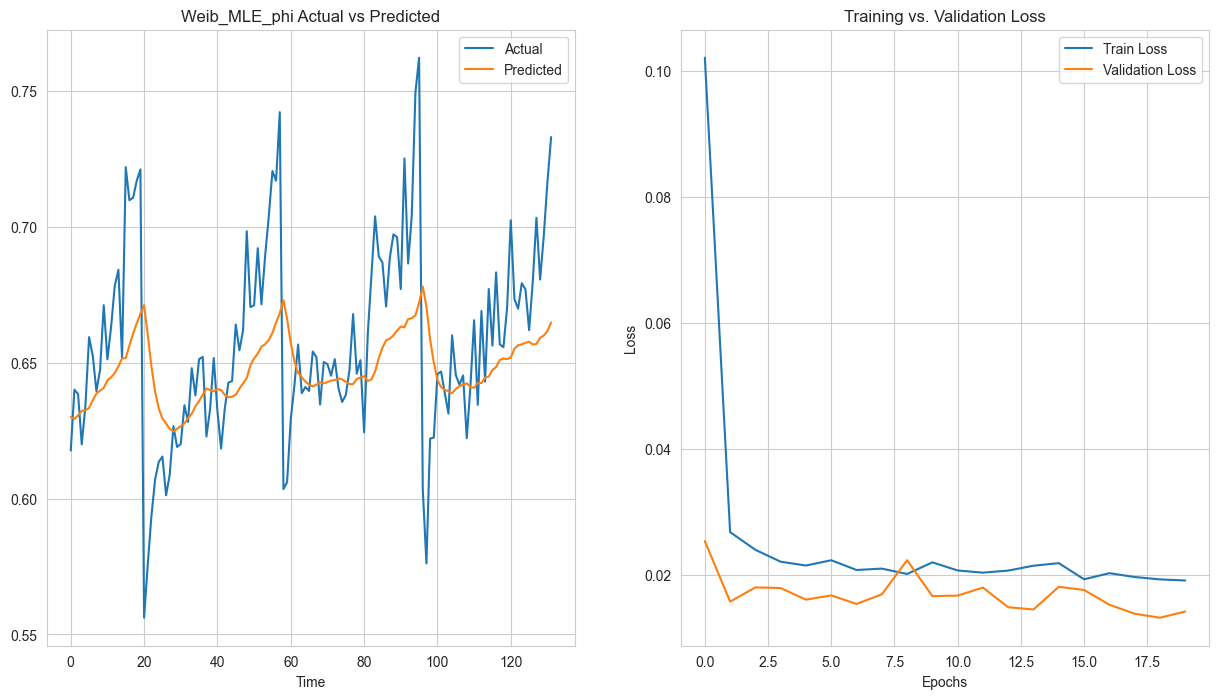

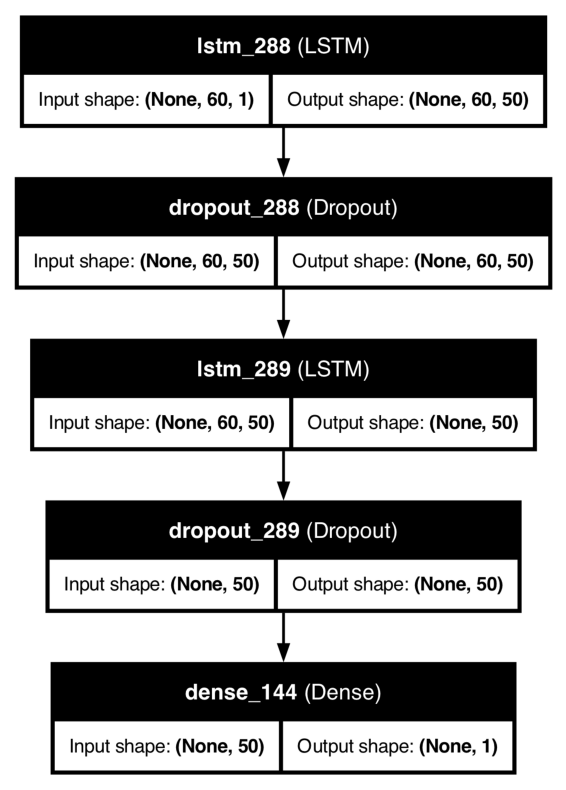

Model: "sequential_144"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_288 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_288 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_289 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_289 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Weib_MLE/Weib_MLE_phi_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Weib_MLE/Weib_MLE_phi_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.10206139087677002, 0.026795024052262306, 0.02398555725812912, 0.022098183631896973, 0.021497707813978195, 0.022333167493343353, 0.020787803456187248, 0.021005839109420776, 0.0201549232006073, 0.021998653188347816, 0.020711490884423256, 0.020366378128528595, 0.020695656538009644, 0.021466802805662155, 0.02187296375632286, 0.019313691183924675, 0.020281217992305756, 0.01967437006533146, 0.019296787679195404, 0.019126273691654205]
Training Theta model...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0405 - val_loss: 0.0155
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0205 - val_loss: 0.0160
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0179 - val_loss: 0.0131
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0179 - val_loss: 0.0111
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - val_loss: 0.0104
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - val_loss: 0.0089
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0158 - val_loss: 0.0099
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0134 - val_loss: 0.0078
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - val_loss: 0.0078
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - val_loss: 0.0082
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - val_loss: 0.0080
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - val_l

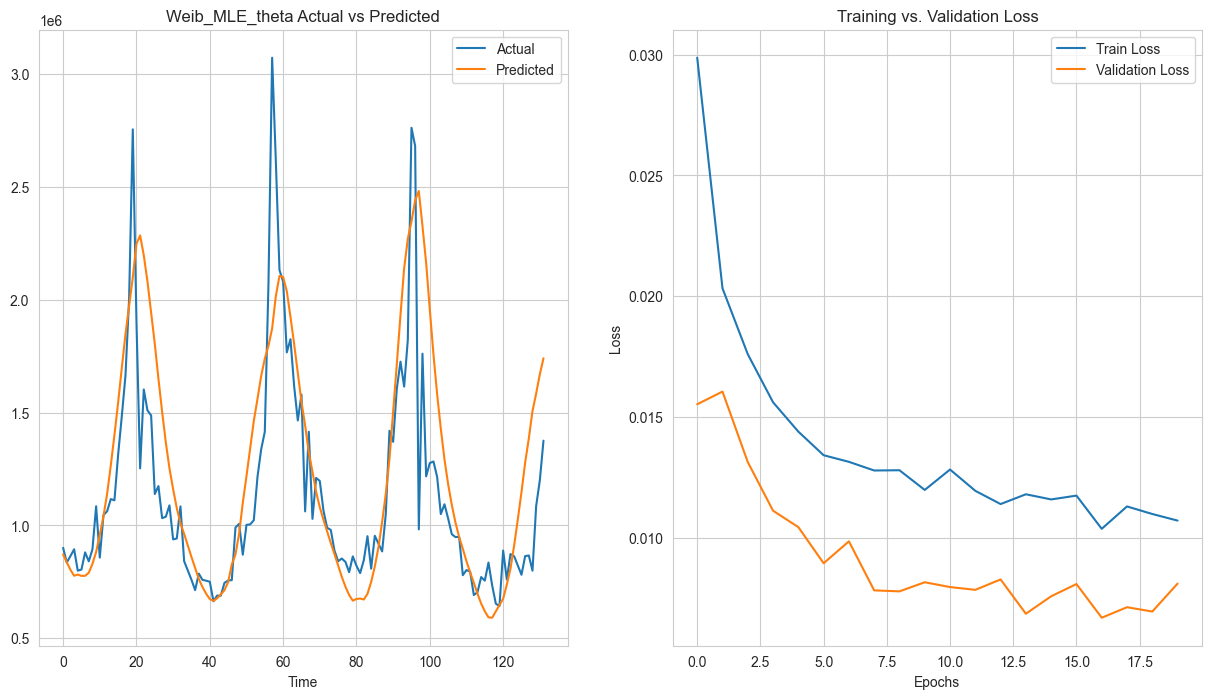

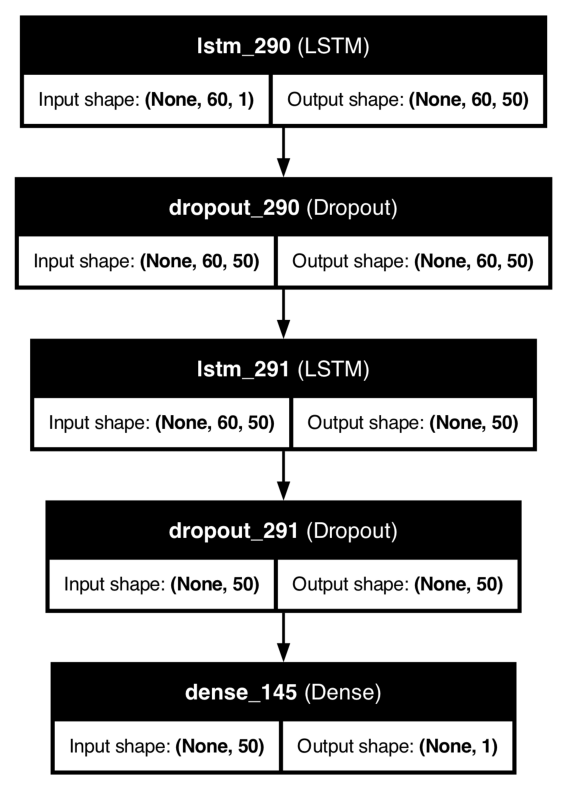

Model: "sequential_145"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_290 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_290 (Dropout)           │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_291 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_291 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

Combined plot saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Weib_MLE/Weib_MLE_theta_lstm_combined_plot.pdf
Model saved at: /Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots/Weib_MLE/Weib_MLE_theta_lstm_model.h5
dict_keys(['loss', 'val_loss'])
[0.029870837926864624, 0.02032625861465931, 0.017598086968064308, 0.015607687644660473, 0.014392492361366749, 0.013415461406111717, 0.013142049312591553, 0.012783007696270943, 0.012793855741620064, 0.011978361755609512, 0.012823649682104588, 0.011941895820200443, 0.011393650434911251, 0.011798843741416931, 0.011585230007767677, 0.0117440614849329, 0.010369090363383293, 0.01129554770886898, 0.010982338339090347, 0.010709199123084545]
Successfully processed Weib_MLE


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# Existing functions (extract_title_from_filename, plot_time_series, process_all_distributions)
# remain unchanged up to the process_all_distributions function

# [Previous code for extract_title_from_filename, plot_time_series remains identical...]

def prepare_data(df, sequence_length=60):
    """Prepare time series data for LSTM training."""
    data = df['value'].values.reshape(-1, 1)

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Create sequences
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:i+sequence_length])
        y.append(scaled_data[i+sequence_length])

    X = np.array(X)
    y = np.array(y)

    # Split into train and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    return X_train, X_test, y_train, y_test, scaler

def build_lstm_model(input_shape):
    """Construct and compile LSTM model."""
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, epochs=20, batch_size=32):
    """Train model and make predictions."""
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        verbose=1)
    y_pred = model.predict(X_test)
    return y_pred, history

def train_lstm(df, param_name, output_dir, dist, method, sequence_length=60, epochs=20):
    """Full LSTM training pipeline."""
    # Prepare data
    X_train, X_test, y_train, y_test, scaler = prepare_data(df, sequence_length)

    # Build model
    input_shape = (X_train.shape[1], X_train.shape[2])
    model = build_lstm_model(input_shape)

    # Train model
    y_pred, history = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, epochs)

    # Inverse transform predictions
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    print(f"RMSE for {param_name}: {rmse:.4f}")
    # Create a single figure with a 2x2 grid layout
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))  # 1 row, 2 columns

    # ---- 1️⃣ Actual vs. Predicted (Left plot) ----
    axes[0].plot(y_test_inv, label='Actual')
    axes[0].plot(y_pred_inv, label='Predicted')
    axes[0].set_title(f'{dist}_{method}_{param_name} Actual vs Predicted')
    axes[0].set_xlabel("Time")
    axes[0].legend()

    # ---- 2️⃣ Training vs. Validation Loss (Right plot) ----
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].set_title('Training vs. Validation Loss')

    # ---- 3️⃣ Model Architecture (Bottom-left) ----
    plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)
    img = mpimg.imread("model_architecture.png")
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis("off")

    # Adjust layout and save the combined figure
    plt.tight_layout()
    plot_path = output_dir / f"{dist}_{method}_{param_name}_lstm_combined_plot.pdf"
    plt.savefig(plot_path, dpi=300)
    plt.show()

    # Save model
    model_path = output_dir / f"{dist}_{method}_{param_name}_lstm_model.h5"
    model.save(model_path)
    model.summary()

    print(f"Combined plot saved at: {plot_path}")
    print(f"Model saved at: {model_path}")


    # Save training history
    history_path = output_dir / f"{dist}_{method}_{param_name}_training_history.npy"
    np.save(history_path, history.history)
    
    loaded_history = np.load(history_path, allow_pickle=True).item()

    # Access values like before
    print(loaded_history.keys())  # Check available keys like 'loss', 'val_loss'
    print(loaded_history['loss'])  # Example: Print training loss per epoch
    
    


    return rmse

def process_all_distributions(data_dir, output_dir, num_points=None):
    """
    Modified version that includes LSTM training
    """
    data_dir = Path(data_dir)
    output_dir = Path(output_dir)

    distributions = ['Gamma', 'InvG', 'LogN', 'Weib']
    methods = ['LeastSquare', 'MLE']

    for dist in distributions:
        print(f"\nProcessing {dist} distribution...")
        for method in methods:
            pattern = f"{dist}_{method}_*.csv"
            matching_files = list(data_dir.glob(pattern))

            phi_file = next((f for f in matching_files if 'phi' in f.name.lower()), None)
            theta_file = next((f for f in matching_files if 'theta' in f.name.lower()), None)

            if phi_file and theta_file:
                print(f"Processing {method} method...")
                try:
                    # Get folder name from first file
                    folder_name = extract_title_from_filename(str(phi_file))[2]
                    model_output_dir = output_dir / folder_name
                    model_output_dir.mkdir(parents=True, exist_ok=True)

                    # Process plots
                    plot_time_series(
                        str(phi_file),
                        str(theta_file),
                        save_plots=True,
                        output_dir=output_dir,
                        num_points=num_points
                    )

                    # Load data for LSTM
                    phi_df = pd.read_csv(phi_file)
                    theta_df = pd.read_csv(theta_file)

                    if num_points is not None:
                        phi_df = phi_df.head(num_points)
                        theta_df = theta_df.head(num_points)

                    # Train LSTM models
                    print("Training Phi model...")
                    train_lstm(phi_df, 'phi', model_output_dir, dist, method)

                    print("Training Theta model...")
                    train_lstm(theta_df, 'theta', model_output_dir, dist, method)

                    print(f"Successfully processed {dist}_{method}")
                except Exception as e:
                    print(f"Error processing {dist}_{method}: {str(e)}")
            else:
                print(f"Warning: Could not find matching files for {dist}_{method}")

# Example usage remains the same
if __name__ == "__main__":
    process_all_distributions(
        data_dir="/Users/moha-/Desktop/data_mohamed/Datasets/mohamed/processed_data/",
        output_dir="/Users/moha-/Desktop/data_mohamed/Datasets/mohamed/output_plots",
        num_points=720
    )